In [6]:
import json
import requests
from api_keys import api_key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from citipy import citipy

## Generate the list of 500+ cities

In [7]:
cities = []

while len(cities) < 550:
    lat_random = random.randint(-90, 90) #-90 to 90
    lon_random = random.randint(-190, 180) #-180 to 190
    city = citipy.nearest_city(lat_random, lon_random)
    if city.city_name not in cities:
        cities.append(city.city_name)

In [8]:
pd.DataFrame(cities)

,0
0,luderitz
1,punta arenas
2,tanabe
3,vaini
4,provideniya
...,...
545,abha
546,bilibino
547,mangai
548,gurskoye


In [9]:
#set up all the list that you want to use
url = "http://api.openweathermap.org/data/2.5/weather?"
country_500 = []
longtitude_500 = []
latitude_500 = []
temperature_500 = []
cloudiness_500 = []
wind_speed_500 = []
humidity_500 = []
cities_500 = []

In [10]:
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        country_500.append(weather_json["sys"]["country"])
        longtitude_500.append(weather_json["coord"]["lon"])
        latitude_500.append(weather_json["coord"]["lat"])
        temperature_500.append(weather_json["main"]["temp"])
        cloudiness_500.append(weather_json["clouds"]["all"])
        wind_speed_500.append(weather_json["wind"]["speed"])
        humidity_500.append(weather_json["main"]["humidity"])
        cities_500.append(weather_json["name"])
        print(f"there is right data in {city}")
    except:
        print(f"there is no data in {city}")
print(len(country_500))

there is right data in luderitz
there is right data in punta arenas
there is right data in tanabe
there is right data in vaini
there is right data in provideniya
there is right data in rikitea
there is right data in sao marcos
there is right data in kavieng
there is right data in thompson
there is right data in busselton
there is right data in carnarvon
there is right data in new norfolk
there is right data in husavik
there is right data in atuona
there is no data in mentok
there is right data in mar del plata
there is right data in cangucu
there is right data in laguna
there is right data in bathsheba
there is no data in grand river south east
there is right data in sinnamary
there is right data in ushuaia
there is right data in faanui
there is right data in san onofre
there is no data in tsihombe
there is right data in hilo
there is right data in mabaruma
there is right data in sabang
there is right data in saint-philippe
there is right data in meulaboh
there is right data in albany


there is right data in victoria
there is right data in isla vista
there is right data in narsaq
there is right data in tasiilaq
there is right data in praia
there is right data in umm lajj
there is no data in do rud
there is right data in roslavl
there is right data in pochutla
there is no data in samusu
there is right data in leningradskiy
there is right data in ostrovnoy
there is right data in lokosovo
there is right data in rio grande
there is right data in xiaoshi
there is right data in salalah
there is no data in sogdiondon
there is right data in tessalit
there is right data in gamba
there is right data in akyab
there is right data in itacoatiara
there is right data in acarau
there is right data in chiguayante
there is right data in unguia
there is no data in kazalinsk
there is right data in mount gambier
there is right data in nishihara
there is no data in amderma
there is right data in airai
there is right data in norton shores
there is right data in itaituba
there is right data

there is right data in sao joao da barra
there is right data in gravdal
there is right data in lubaczow
there is right data in arlit
there is right data in wicklow
there is right data in adre
there is right data in iranshahr
there is right data in garowe
there is right data in malakal
there is no data in mrirt
there is right data in port shepstone
there is right data in agadez
there is right data in kavali
there is right data in lima
there is right data in fukue
there is right data in taoudenni
there is right data in masumbwe
there is right data in pitimbu
there is right data in salinas
there is right data in kysyl-syr
there is right data in general pico
there is right data in havre
there is right data in davidson
there is right data in verkh-usugli
there is right data in presidencia roque saenz pena
there is right data in peleduy
there is right data in camacha
there is right data in muros
there is right data in bichura
there is right data in abonnema
there is right data in lyuban
ther

In [17]:
weather_500_pf = pd.DataFrame({"Country" : country_500,
                               "City" : cities_500,
                               "Longtitude" : longtitude_500,
                               "Latitude" : latitude_500,
                               "Temperature" : temperature_500,
                               "Cloudiness" : cloudiness_500,
                               "Humidity" : humidity_500,
                              "Wind Speed" : wind_speed_500})
weather_500_pf

,Country,City,Longtitude,Latitude,Temperature,Cloudiness,Humidity,Wind Speed
0,NA,Lüderitz,15.1594,-26.6481,295.31,54,50,3.62
1,CL,Punta Arenas,-70.9167,-53.1500,276.21,20,81,8.75
2,JP,Tanabe,135.3667,33.7333,297.00,75,80,0.45
3,TO,Vaini,-175.2000,-21.2000,296.24,75,94,3.09
4,RU,Provideniya,-173.3000,64.3833,275.30,100,98,3.58
...,...,...,...,...,...,...,...,...
504,CL,Buin,-70.7500,-33.7333,276.17,100,57,1.37
505,SA,Abhā,42.5053,18.2164,301.29,34,6,5.14
506,RU,Bilibino,166.4372,68.0546,287.33,99,51,1.02
507,CD,Mangai,19.5333,-4.0500,307.54,100,20,1.86


## Temperature (F) vs. Latitude

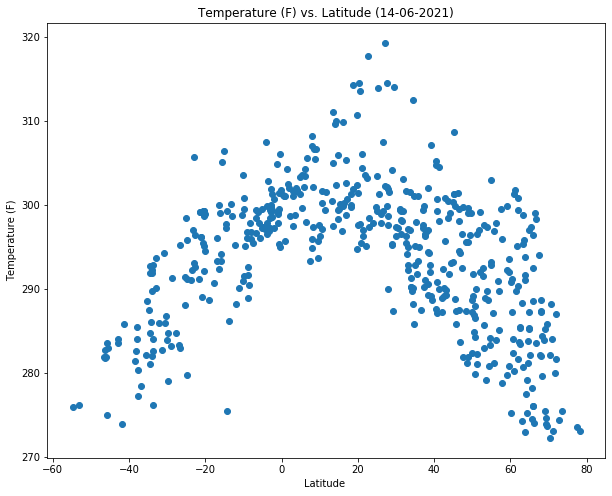

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,temperature_500)
plt.xlabel("Latitude ")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude (14-06-2021)")
plt.show()

## Humidity (%) vs. Latitude

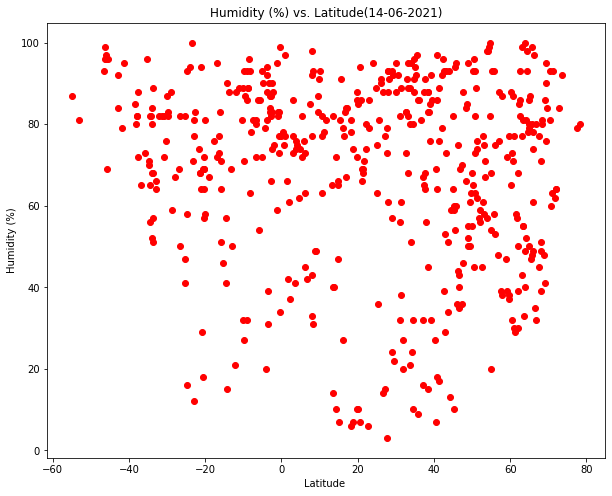

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,humidity_500, color = 'r')
plt.xlabel("Latitude ")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude(14-06-2021)")
plt.show()

## Cloudiness (%) vs. Latitude

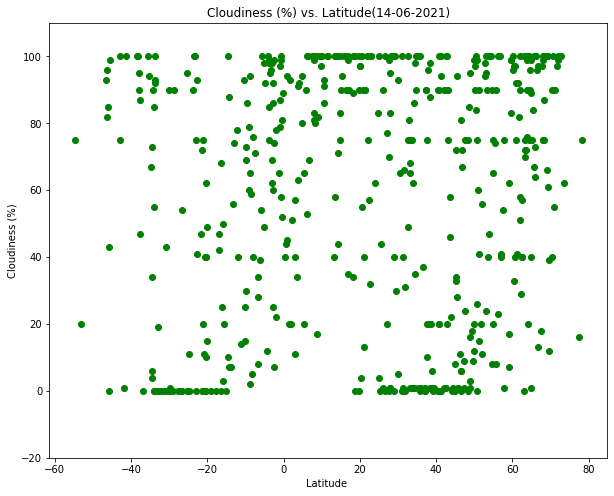

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,cloudiness_500, color = 'g')
plt.ylim(-20,(weather_500_pf["Cloudiness"].max()+10))
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude(14-06-2021)")
plt.show()

## Wind Speed (mph) vs. Latitude

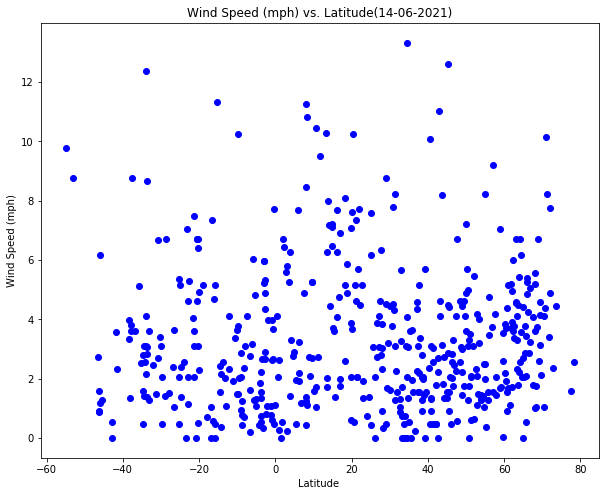

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(latitude_500,wind_speed_500, color = 'b')
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude(14-06-2021)")
plt.show()